In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os
import cv2
zip_path = '/content/drive/MyDrive/content/IndianFoodDataset/Dataset.zip'

with zipfile.ZipFile(zip_path,"r") as zip_file_reference:
    zip_file_reference.extractall("IndianFoodImages")

# Read dataset

In [ ]:
import os
import cv2
directory_for_data = '/content/IndianFoodImages'
Name=[]
for file in os.listdir(directory_for_data):
    Name+=[file]
print(Name)
print(len(Name))

['sheer_korma', 'poornalu', 'double_ka_meetha', 'kalakand', 'pootharekulu', 'aloo_methi', 'bhindi_masala', 'chicken_tikka_masala', 'kuzhi_paniyaram', 'modak', 'gavvalu', 'kadai_paneer', 'shrikhand', 'sohan_halwa', 'anarsa', 'bhatura', 'makki_di_roti_sarson_da_saag', 'doodhpak', 'sandesh', 'biryani', 'gajar_ka_halwa', 'dum_aloo', 'aloo_matar', 'kakinada_khaja', 'qubani_ka_meetha', 'chak_hao_kheer', 'misti_doi', 'aloo_gobi', 'daal_baati_churma', 'aloo_shimla_mirch', 'daal_puri', 'rasgulla', 'kofta', 'malapua', 'kajjikaya', 'chicken_razala', 'bandar_laddu', 'dal_tadka', 'shankarpali', 'boondi', 'adhirasam', 'jalebi', 'chikki', 'kadhi_pakoda', 'cham_cham', 'phirni', 'chapati', 'naan', 'pithe', 'ghevar', 'ras_malai', 'basundi', 'misi_roti', 'litti_chokha', 'palak_paneer', 'paneer_butter_masala', 'sutar_feni', 'poha', 'ariselu', 'unni_appam', 'ledikeni', 'mysore_pak', 'rabri', 'lyangcha', 'dal_makhani', 'kachori', 'lassi', 'sheera', 'dharwad_pedha', 'sohan_papdi', 'karela_bharta', 'chhena_kh

In [ ]:
Name = ['mysore_pak', 'unni_appam', 'paneer_butter_masala', 'jalebi', 'biryani', 'chapati','dal_tadka','poha']

N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]



In [ ]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
training_data=[]
testing_data =[]
count=0
for file in tqdm(Name):
    t=0
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        if t<40:
            training_data+=[[image,count]]
        else:
            testing_data +=[[image,count]]
        t+=1     
    count+=1

100%|██████████| 8/8 [00:03<00:00,  2.00it/s]


In [ ]:
data,labels0=zip(*training_data)
test,testlabels0=zip(*testing_data)

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

labels1=to_categorical(labels0)
labels=np.array(labels1)

In [ ]:

data=np.array(data)
test=np.array(test)

In [ ]:
from sklearn.model_selection import train_test_split

trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(256, 40, 40, 3)
(64, 40, 40, 3)
(256, 8)
(64, 8)


In [ ]:

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.5,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")


# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=200,zoom_range=0.6,
#                         width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(8, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=16),validation_data=(testx,testy),epochs=100)

Epoch 1/100
16/16 [==============================] - 3s 166ms/step - loss: 0.8900 - accuracy: 0.7109 - val_loss: 0.9786 - val_accuracy: 0.6875
Epoch 2/100
16/16 [==============================] - 3s 170ms/step - loss: 0.7707 - accuracy: 0.7461 - val_loss: 1.1697 - val_accuracy: 0.6250
Epoch 3/100
16/16 [==============================] - 3s 168ms/step - loss: 0.7178 - accuracy: 0.7773 - val_loss: 0.8580 - val_accuracy: 0.6719
Epoch 4/100
16/16 [==============================] - 3s 161ms/step - loss: 0.7551 - accuracy: 0.7578 - val_loss: 1.0084 - val_accuracy: 0.7031
Epoch 5/100
16/16 [==============================] - 3s 167ms/step - loss: 0.7895 - accuracy: 0.7617 - val_loss: 0.9045 - val_accuracy: 0.7188
Epoch 6/100
16/16 [==============================] - 3s 166ms/step - loss: 0.6577 - accuracy: 0.7773 - val_loss: 0.9118 - val_accuracy: 0.6562
Epoch 7/100
16/16 [==============================] - 3s 166ms/step - loss: 0.7663 - accuracy: 0.7266 - val_loss: 0.9044 - val_accuracy: 0.7031

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk


In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:


image=load_img("/content/IndianFoodImages/biryani/07ca591901.jpg",target_size=(40,40))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)




In [ ]:
prediction=loaded_model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is biryani.


In [ ]:


print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]



(60, 40, 40, 3)
(60, 6)


In [ ]:
ANS=testlabels0

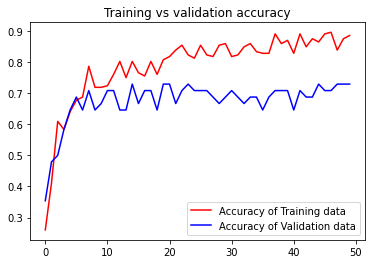

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Training accuracy')
plt.plot(epochs, value_acc, 'b', label='Validation accuracy')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()



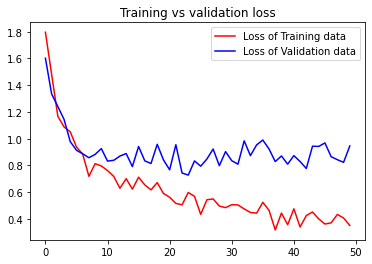

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# Flask Backend


In [ ]:
pip install flask

In [ ]:
pip install -U flask-cors

In [ ]:
!python --version

Python 3.7.12


In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
from keras.models import load_model
import cv2
import numpy as np
from flask_cors import CORS
from flask import jsonify
from __future__ import unicode_literals
import json
import time
from flask import request
app = Flask(__name__)
run_with_ngrok(app)  


# LOAD THE MODEL HERE
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")

data_path = '/content/drive/MyDrive/content/nutri.csv'


@app.route("/foodchecker")
def home():
    return "Welcome to flask backend !"

calorie_data = pd.read_csv(data_path)
calorie_data.head()
def load_calorie_data(name_of_food):
  calorie_data_of_food = calorie_data[calorie_data['Food Name']==name_]
  return calorie_data_of_food

@app.route("/food_check")  
def predict_by_model():
    try:
      image=load_img("/content/IndianFoodImages/adhirasam/02d09e872d.jpg",target_size=(40,40))

      # preprocessing the image
      image=img_to_array(image) 
      image=image/255.0
      prediction_image=np.array(image)
      prediction_image= np.expand_dims(image, axis=0)
      # predict the model
      prediction= loaded_model.predict(prediction_image)
      value=np.argmax(prediction)
      food_name =mapper(value)
      print("Prediction is {}.".format(food_name ))

      calorie_data_of_food = load_calorie_data(food_name)
      dictionary_response = {'name_of_food':food_name,'CALORIES':calorie_data_of_food['calories'],'CARBS':calorie_data_of_food['carbs_gram'],'FATS':calorie_data_of_food['fats_gram'],'PROTIEN':calorie_data_of_food['protien_gram'],'SUITABLE_DIABETES':None,'SUITABLE_CHOLESTROL':None,'SUITABLE_PREGNANCY':None}
      json_response = json.load(dictionary_response)

      return json_response

    except Exception as e:
      return jsonify(error=str(e))
     
     
CORS(app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://525b-35-239-166-174.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
